In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
df=pd.read_csv(r"C:\Users\panka\Downloads\bank-full.csv",delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [32]:
df.shape

(45211, 17)

In [33]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## No null values present in data

# converting categorical data to numeric

In [35]:
df=pd.get_dummies(data=df,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'])
df

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1


# Finding Coorelation

In [36]:
df.corr()

C:\Users\panka\AppData\Local\Temp\ipykernel_19996\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,-0.004495,0.013225,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901


C:\Users\panka\AppData\Local\Temp\ipykernel_19996\4112725454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

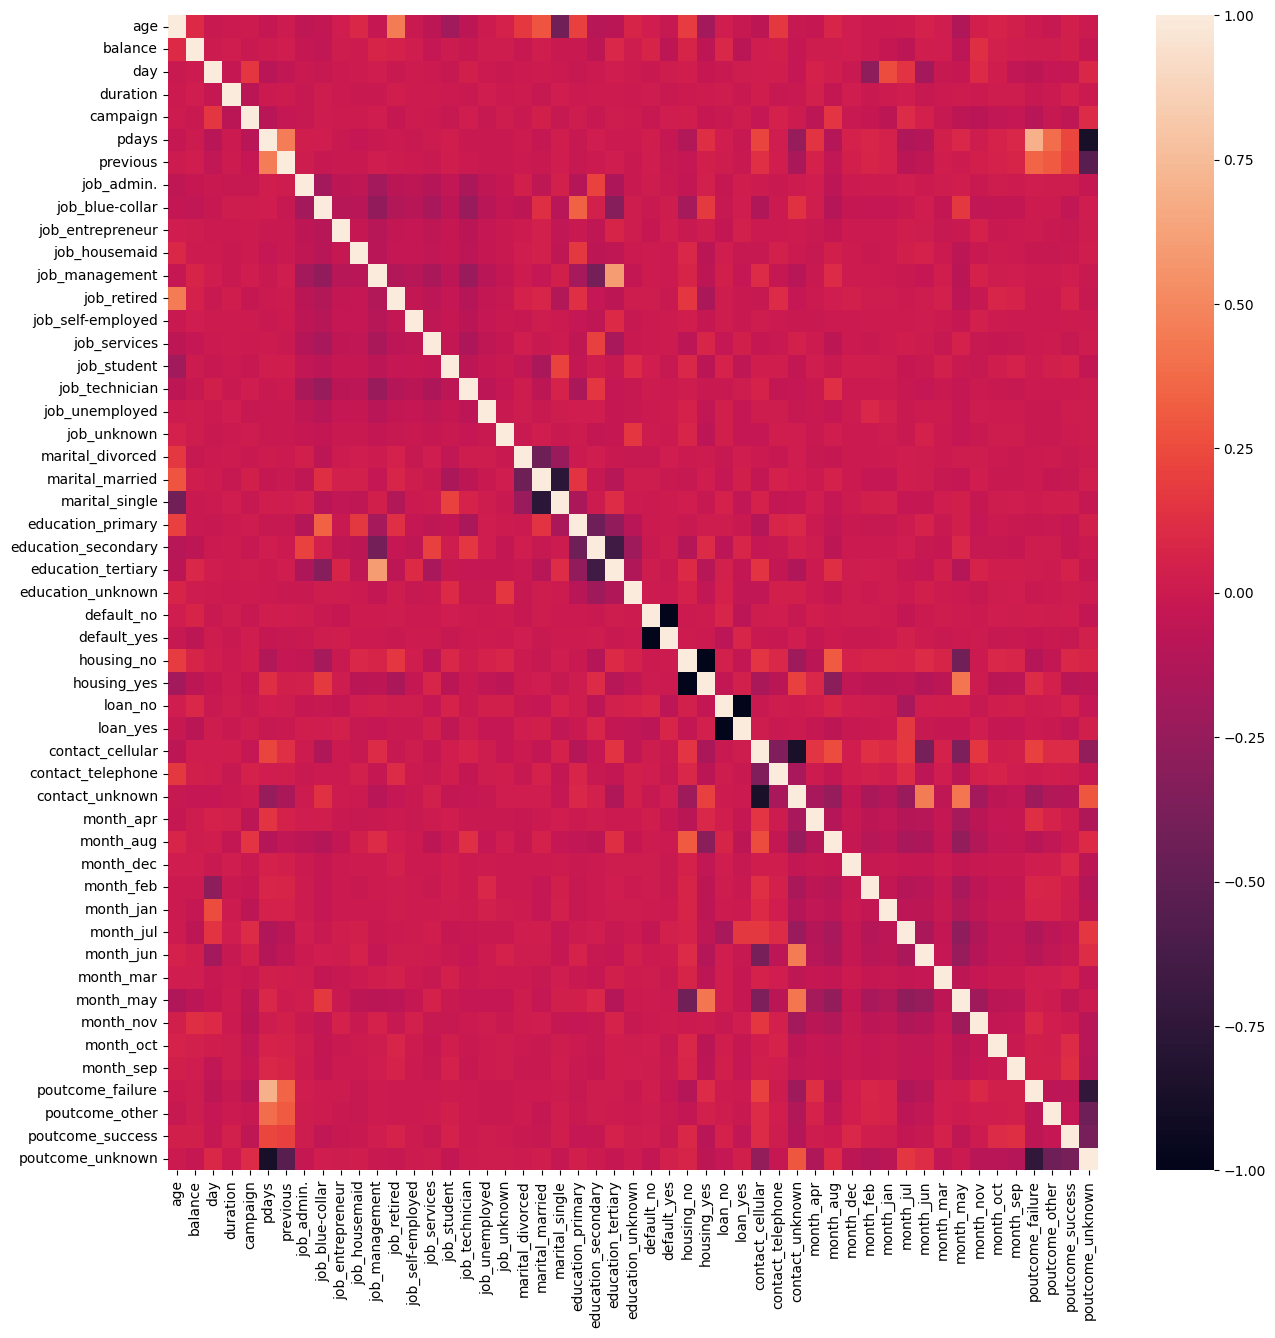

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [38]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


# Writting Function To Find Correlation and Remove Those Columns

In [39]:
import pandas as pd

def remove_highly_correlated_columns(df, threshold=0.8):
    """
    Removes columns from the DataFrame that are highly correlated based on the given threshold.
    
    Parameters:
        df (DataFrame): The input DataFrame.
        threshold (float): The correlation threshold above which columns are considered highly correlated.
    
    Returns:
        DataFrame: DataFrame with highly correlated columns removed.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a boolean mask of columns to remove
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the highly correlated columns
    df_filtered = df.drop(columns=columns_to_drop)
    
    return df_filtered


In [40]:
df=remove_highly_correlated_columns(df)
df.head()

C:\Users\panka\AppData\Local\Temp\ipykernel_19996\2162346828.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0


### Five columns removed which are creating multicolinearity problem

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   previous             45211 non-null  int64 
 7   y                    45211 non-null  object
 8   job_admin.           45211 non-null  uint8 
 9   job_blue-collar      45211 non-null  uint8 
 10  job_entrepreneur     45211 non-null  uint8 
 11  job_housemaid        45211 non-null  uint8 
 12  job_management       45211 non-null  uint8 
 13  job_retired          45211 non-null  uint8 
 14  job_self-employed    45211 non-null  uint8 
 15  job_services         45211 non-null  uint8 
 16  job_

In [42]:
df.duplicated().sum()

0

## No duplicate values present in dataset

# Splitting data into dependent and independent variables

In [43]:
x=df.drop(columns=['y'])
x.shape

(45211, 46)

In [44]:
y=df['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

# Applying label encoding on dependent data

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
41626,52,118,25,105,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
31347,28,459,16,83,13,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
22563,36,156,22,122,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37243,55,323,13,200,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
32259,38,904,16,361,1,339,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
3776,40,580,16,192,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9928,47,3644,9,83,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33409,25,538,20,226,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15738,56,217,21,121,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13847,55,645,10,123,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10200,42,2821,11,203,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32106,43,2557,15,165,2,327,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25565,58,60,19,291,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\panka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.60      0.21      0.31      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.60      0.63     11303
weighted avg       0.87      0.89      0.86     11303



In [51]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8912940898902914, 0.8886136423958241)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[9759  191]
 [1068  285]]


In [57]:
(9759+285 )/(9759+285+1068+191)

0.8886136423958241

Text(0, 0.5, 'True positive rate')

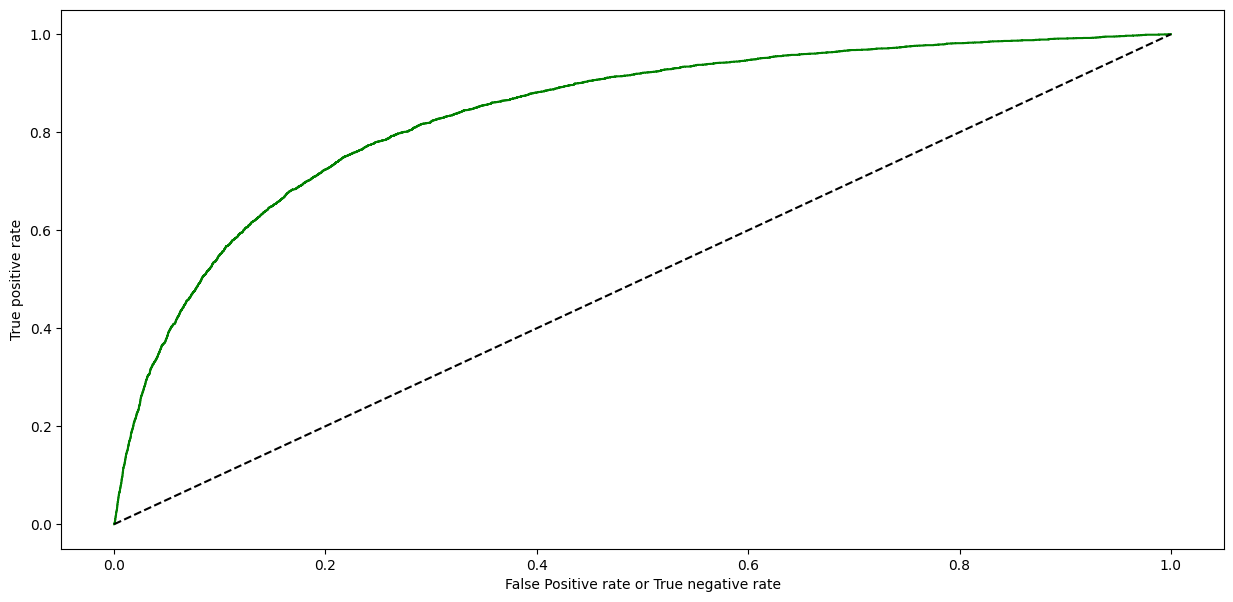

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_train,lr.predict_proba(x_train)[:,1])
auc=roc_auc_score(y_test,y_pred)
plt.figure(figsize=(15,7))
plt.plot(fpr,tpr,'g')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate or True negative rate')
plt.ylabel('True positive rate')